In [2]:
import pandas as pd


<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       LOAD THE CLEAN FILE      .  <BR>     

</div>

In [3]:
df= pd.read_csv('Clean_Hospitalization.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   DIABETES                                                                   514 non-null    object
 1   HOSPITALIZACIÓN ULTIMO MES                                                 514 non-null    object
 2   BIOPSIAS PREVIAS                                                           514 non-null    object
 3   VOLUMEN PROSTATICO                                                         514 non-null    object
 4   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                    514 non-null    object
 5   NUMERO DE MUESTRAS TOMADAS                                                 514 non-null    int64 
 6   CUP                                                               

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       TRANSFORM THE CATEGORIZE FILES       .  <BR>     

</div>

In [5]:
#Seleccionamos todas las columnas de tipo object
col_obj = df.select_dtypes(include=['object']).columns

print(col_obj)

Index(['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS',
       'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION', 'RANGO EDAD', 'RANGO PSA'],
      dtype='object')


In [6]:
# Creamos un dataframe con todos los discretos para unirlos despues con todas las transformaciones categoricas.
df_discreto = df.select_dtypes(include=['int64', 'float64'])
df_discreto.head(5)

,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,12,1,2,0
1,12,1,5,0
2,12,1,5,0
3,12,2,3,0
4,12,2,3,0


In [7]:
df_discreto.shape

(514, 4)

In [8]:
df1 =df.copy()

In [9]:
df1.head(2)

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,RANGO EDAD,RANGO PSA
0,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0,Edad 50-59,PSA 0-5.99
1,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0,Edad 50-59,PSA 7-7.99


In [10]:
# Creo la lista para usarla en el bucle donde creare el dataframe con lso valores categoricos transformados. 
col_list = ['DIABETES',
           'HOSPITALIZACIÓN ULTIMO MES',
           'BIOPSIAS PREVIAS',
           'VOLUMEN PROSTATICO', 
           'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
           'ENF. CRONICA PULMONAR OBSTRUCTIVA',
           'BIOPSIA',
           'FIEBRE',
           'ITU',
           'TIPO DE CULTIVO',
           'AGENTE AISLADO',
           'PATRON DE RESISTENCIA',
           'RANGO EDAD', 
           'RANGO PSA',           
           'HOSPITALIZACION'    
]

In [11]:
# Loop for the df creation

for col in col_list:
    df_dummy = pd.get_dummies(df1[col], prefix=col, dtype=int)
    df_discreto = pd.merge(df_discreto, df_dummy, left_index=True, right_index=True, how='inner')


In [12]:
#Se agregan 50 nuevas columnas
df_discreto.shape

(514, 55)

In [13]:
df_discreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 55 columns):
 #   Column                                                                                                 Non-Null Count  Dtype
---  ------                                                                                                 --------------  -----
 0   NUMERO DE MUESTRAS TOMADAS                                                                             514 non-null    int64
 1   NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA                              514 non-null    int64
 2   DIAS HOSPITALIZACION MQ                                                                                514 non-null    int64
 3   DIAS HOSPITALIZACIÓN UPC                                                                               514 non-null    int64
 4   DIABETES_NO                                                                                            514 non

In [16]:
df_discreto.head(3)

,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,DIABETES_NO,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_NO,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_NO,BIOPSIAS PREVIAS_SI,...,RANGO EDAD_Edad 60-69,RANGO PSA_PSA 0-5.99,RANGO PSA_PSA 10+,RANGO PSA_PSA 6-6.99,RANGO PSA_PSA 7-7.99,RANGO PSA_PSA 8-8.99,RANGO PSA_PSA 9-9.99,HOSPITALIZACION_NO,HOSPITALIZACION_SI,HOSPITALIZACION_sin dato
0,12,1,2,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,12,1,5,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,12,1,5,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
#Elimino las columnas NO

df_discreto = df_discreto.drop(['DIABETES_NO','HOSPITALIZACIÓN ULTIMO MES_NO','BIOPSIAS PREVIAS_NO' ,'VOLUMEN PROSTATICO_NO','ENF. CRONICA PULMONAR OBSTRUCTIVA_NO'], axis=1)
df_discreto

,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_SI,BIOPSIAS PREVIAS_sin dato,VOLUMEN PROSTATICO_SI,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO,...,RANGO EDAD_Edad 60-69,RANGO PSA_PSA 0-5.99,RANGO PSA_PSA 10+,RANGO PSA_PSA 6-6.99,RANGO PSA_PSA 7-7.99,RANGO PSA_PSA 8-8.99,RANGO PSA_PSA 9-9.99,HOSPITALIZACION_NO,HOSPITALIZACION_SI,HOSPITALIZACION_sin dato
0,12,1,2,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,12,1,5,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,12,1,5,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,12,2,3,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,12,2,3,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,12,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
510,12,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
511,12,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
512,12,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [24]:
df_discreto = df_discreto.drop(['FIEBRE_NO','ITU_NO', 'TIPO DE CULTIVO_NO','AGENTE AISLADO_NO','PATRON DE RESISTENCIA_NO','HOSPITALIZACION_NO'], axis=1)

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       MATRIZ DE CORRELACION       .  <BR>   
   
</div>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
corMatriz = df_discreto.corr()

In [27]:
cor_target = abs(corMatriz["HOSPITALIZACION_SI"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA                                0.554245
DIAS HOSPITALIZACION MQ                                                                                  0.943902
DIAS HOSPITALIZACIÓN UPC                                                                                 0.238723
BIOPSIA_NEG                                                                                              0.119997
FIEBRE_SI                                                                                                0.662040
ITU_SI                                                                                                   0.478849
TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO                                                                 0.337935
TIPO DE CULTIVO_UROCULTIVO                                                                               0.337935
AGENTE AISLADO_E.COLI                                                                   

In [28]:
# revisamos las correlaciones menores o iguales a 0.1 y que clasificamos como irrelevantes
cor_target = abs(corMatriz["HOSPITALIZACION_SI"])
irrelevant_features = cor_target[cor_target<=0.1]
irrelevant_features

NUMERO DE MUESTRAS TOMADAS                                                0.000957
DIABETES_SI                                                               0.003977
HOSPITALIZACIÓN ULTIMO MES_SI                                             0.092515
BIOPSIAS PREVIAS_SI                                                       0.048443
BIOPSIAS PREVIAS_sin dato                                                 0.008166
VOLUMEN PROSTATICO_SI                                                     0.009033
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO      0.060712
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO    0.040491
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS                     0.092139
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS                             0.053726
ENF. CRONICA PULMONAR OBSTRUCTIVA_SI                                      0.037213
ENF. CRONICA PULMONAR OBSTRUCTIVA_sin dato                                0.011559
BIOP

In [29]:
#Borro las columnas que tiene una correlacion menor a 0.1 del df.

df_filtrado = df_discreto.drop(columns=irrelevant_features.index)


In [30]:
#Verifico que las correlaciones menores a 0.1 en relacion con HOSPITALIZACION SI se encuentran borradas 
corMatriz_filtrado = df_filtrado.corr()
cor_target = abs(corMatriz_filtrado["HOSPITALIZACION_SI"])
irrelevant_features_2 = cor_target[cor_target<=0.1]
irrelevant_features_2


Series([], Name: HOSPITALIZACION_SI, dtype: float64)

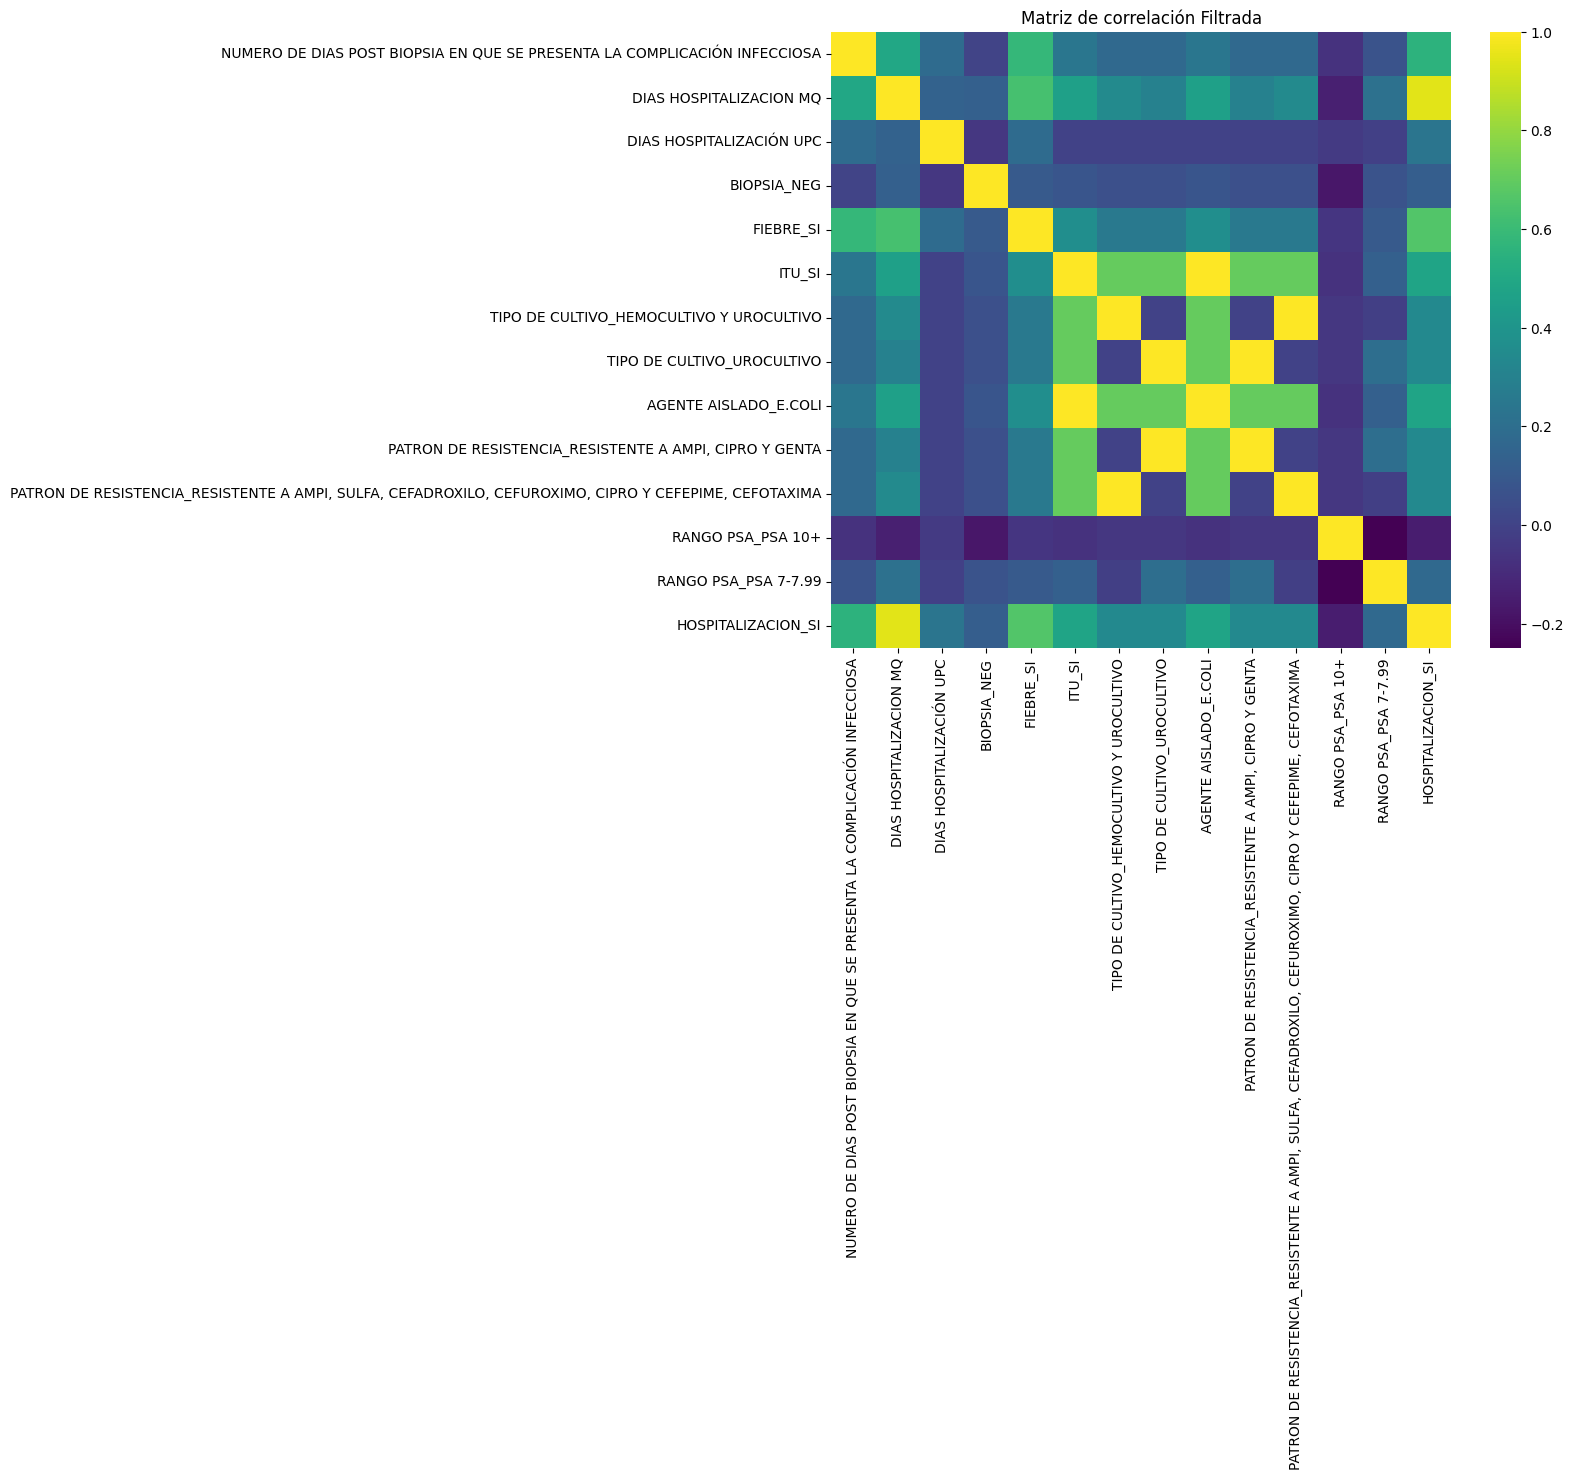

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corMatriz_filtrado, annot=False, cmap='viridis', fmt=".2f")

plt.title('Matriz de correlación Filtrada')

plt.show()

In [32]:
#Volvemos a crear la matriz de correlacion para ver los resultados.

corMatriz_ajustada = df_filtrado.corr()  #Creo la nueva correlacion con la nueva data frame
cor_target_a = abs(corMatriz_ajustada["HOSPITALIZACION_SI"])   #Creo las correlaciones con la columna objetivo


<div style="color: #CBE364; font-size:24px">
ANALISIS DE CORRELACIONES > .75
</div>

<div style="color: #CBE364; font-size:14px">
Filtramos las correlaciones que son mayores a 0.75 y creamos otra grafica para analizarlas mas a detalle

</div>

In [33]:
df_filtrado.head(3)

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,BIOPSIA_NEG,FIEBRE_SI,ITU_SI,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",RANGO PSA_PSA 10+,RANGO PSA_PSA 7-7.99,HOSPITALIZACION_SI
0,1,2,0,1,1,0,0,0,0,0,0,0,0,1
1,1,5,0,1,1,0,0,0,0,0,0,0,1,1
2,1,5,0,1,1,0,0,0,0,0,0,0,1,1


In [34]:
df_filtrado.shape

(514, 14)

In [36]:
# Eliminamos las columnas en las que los se acercan a 1 en relacion a la Hospitalizacion y que no aportan nada.

df_filtrado = df_filtrado.drop(['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'], axis=1)

In [37]:
df_filtrado

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,BIOPSIA_NEG,FIEBRE_SI,ITU_SI,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",RANGO PSA_PSA 10+,RANGO PSA_PSA 7-7.99,HOSPITALIZACION_SI
0,1,1,1,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0,0,1,1
2,1,1,1,0,0,0,0,0,0,0,1,1
3,2,1,0,0,0,0,0,0,0,0,0,1
4,2,1,1,1,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
509,0,1,0,0,0,0,0,0,0,0,0,0
510,0,0,0,0,0,0,0,0,0,0,0,0
511,0,0,0,0,0,0,0,0,0,0,0,0
512,0,0,0,0,0,0,0,0,0,0,0,0


<div style="color: #CBE364; font-size:24px">
CORRELACIONES OPTIMIZADOS <br>
</div>

<div style="color: #CBE364; font-size:14px">
Vuelvo a aplicar las correlaciones con el df optimizado

</div>

In [38]:
corOpt = df_filtrado.corr()

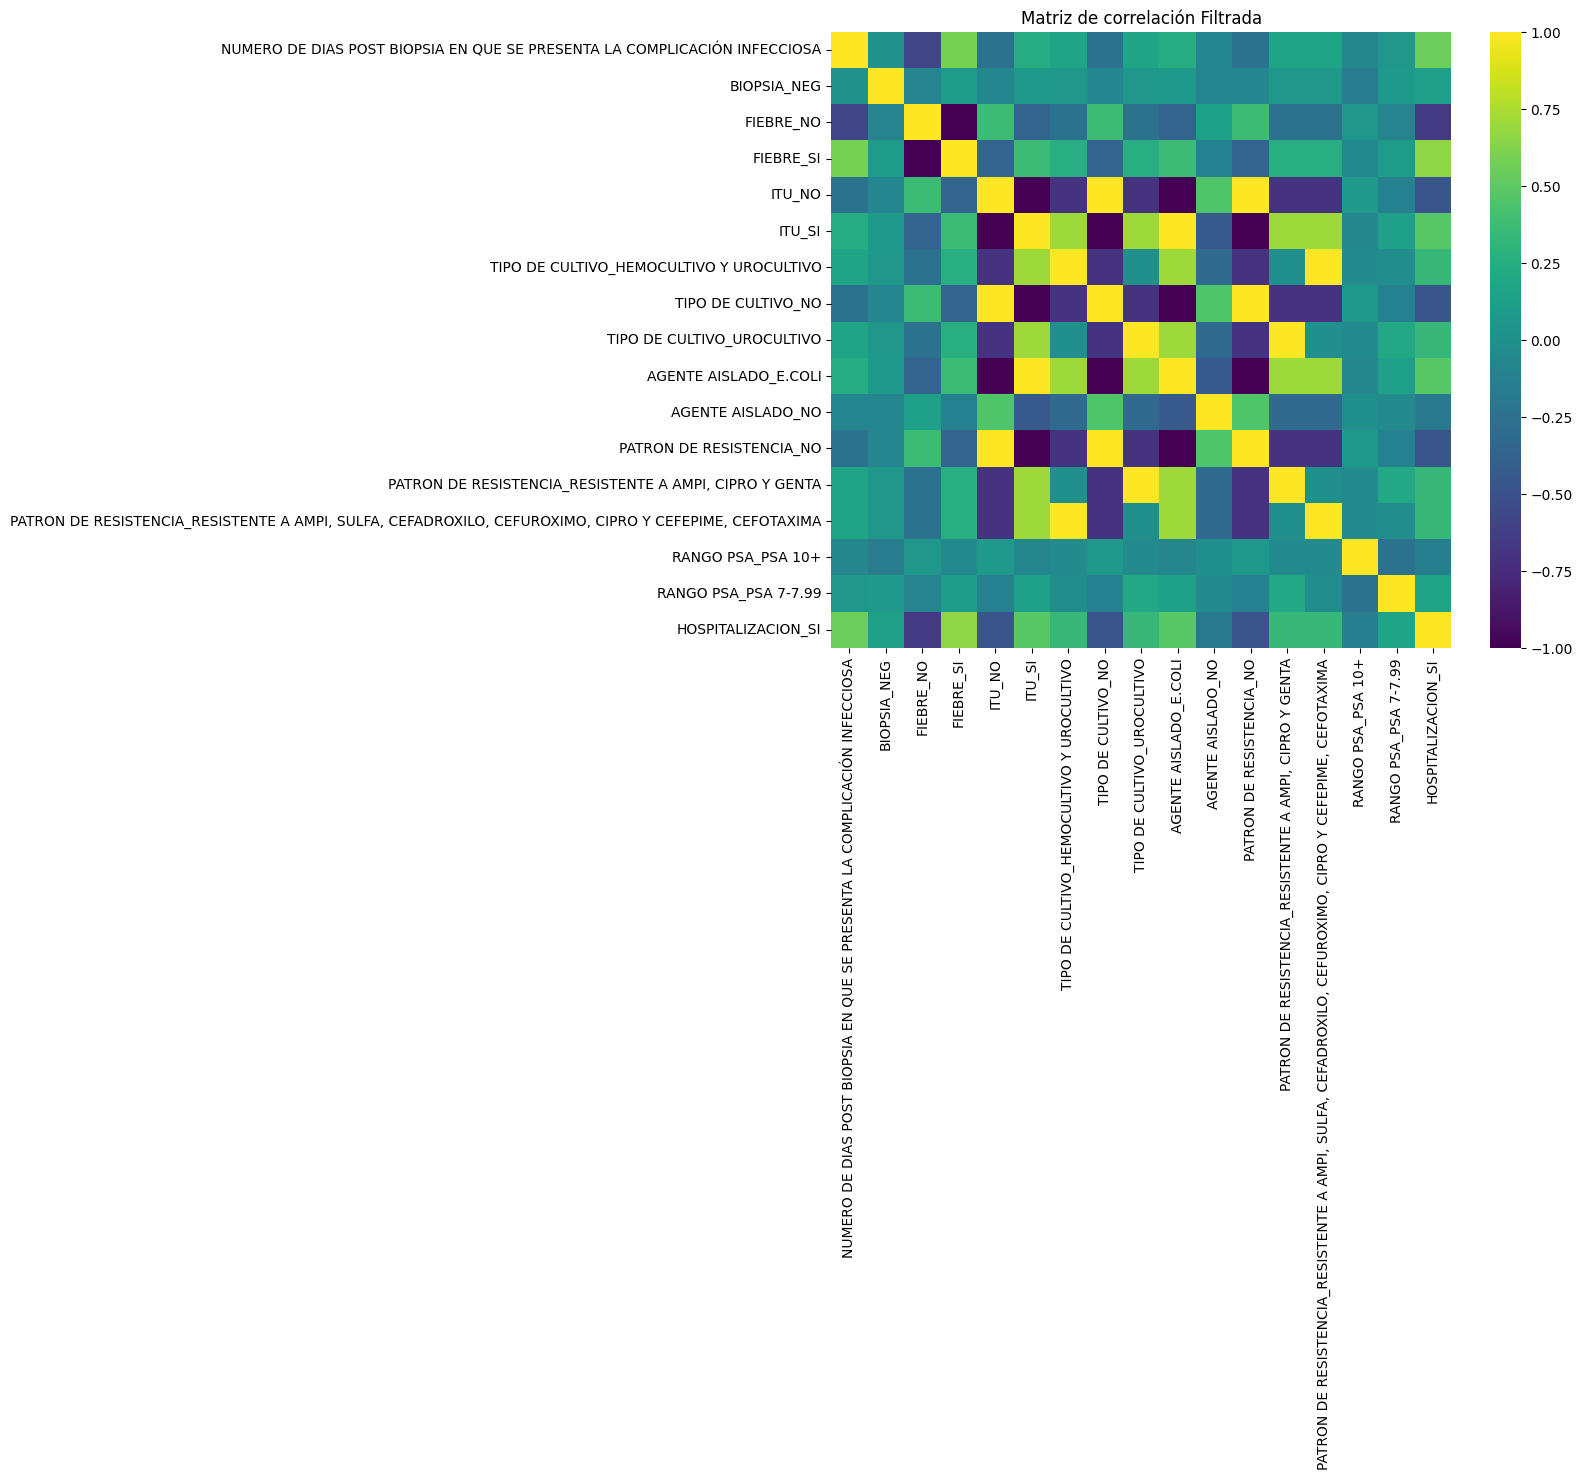

In [ ]:
# Creo la grafica con la nueva correlacion optimizada
plt.figure(figsize=(10, 8))
sns.heatmap(corOpt, annot=False, cmap='viridis', fmt=".2f")

plt.title('Matriz de correlación Filtrada')

plt.show()

In [39]:
# Exportamos el df a un archivo csv para entrenar nuestro modelo

df_filtrado.to_csv('Transform_Hospitalization.csv', index=False)